# **Imports**


In [20]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
import csv
import nltk
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
import pandas as pd


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data_Set Uploadaing and Preprocessing**


In [2]:
voc_size = 1000
oov_tok = "<OOV"
training_portion = .8

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
stopwords_english = stopwords.words('english')

In [5]:
stopwords_english

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
sentences = []
labels = []


In [7]:
with open("/content/bbc-text.csv",'r') as csvfile:
  reader = csv.reader(csvfile, delimiter = ',')
  next(reader)
  for row in reader:
    labels.append(row[0])
    sentence = row[1]
    for word in stopwords_english :
      token = " " + word + " "
      sentence = sentence.replace(token," ")
    sentences.append(sentence)
print(len(labels))
print(len(sentences))
print(sentences[0])




2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite 

In [8]:
print(labels[45])

entertainment


In [8]:
train_size = int(len(sentences) * training_portion)
train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences =  sentences[train_size:]
validation_labels = labels[train_size:]

validation_size = int(len(sentences) - train_size)


In [9]:
print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))
print(validation_size)

1780
1780
1780
445
445
445


In [10]:
validation_labels

['entertainment',
 'tech',
 'politics',
 'sport',
 'sport',
 'tech',
 'business',
 'tech',
 'entertainment',
 'entertainment',
 'politics',
 'politics',
 'business',
 'entertainment',
 'sport',
 'entertainment',
 'entertainment',
 'business',
 'sport',
 'politics',
 'tech',
 'business',
 'sport',
 'entertainment',
 'tech',
 'politics',
 'politics',
 'sport',
 'sport',
 'business',
 'business',
 'business',
 'business',
 'business',
 'entertainment',
 'business',
 'politics',
 'politics',
 'tech',
 'tech',
 'entertainment',
 'politics',
 'entertainment',
 'business',
 'politics',
 'sport',
 'sport',
 'business',
 'tech',
 'business',
 'tech',
 'sport',
 'business',
 'business',
 'politics',
 'sport',
 'sport',
 'politics',
 'politics',
 'entertainment',
 'entertainment',
 'politics',
 'business',
 'politics',
 'politics',
 'business',
 'tech',
 'politics',
 'politics',
 'politics',
 'politics',
 'politics',
 'entertainment',
 'entertainment',
 'tech',
 'politics',
 'sport',
 'politics',

In [11]:
tokenizer = Tokenizer(num_words = voc_size)
tokenizer.fit_on_texts(train_sentences)
x_train = tokenizer.texts_to_matrix(train_sentences)
x_val = tokenizer.texts_to_matrix(validation_sentences)

In [12]:
x_train[10]

array([0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

In [14]:
#Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_labels)
y_train = encoder.transform(train_labels)
y_val = encoder.transform(validation_labels)
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [15]:
y_val[5]

array([0., 0., 0., 0., 1.], dtype=float32)

# **Model**

In [16]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(16,activation='relu',input_shape = (voc_size,)),
        tf.keras.layers.Dense(5,activation='softmax')
]                           
)
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 85        
Total params: 16,101
Trainable params: 16,101
Non-trainable params: 0
_________________________________________________________________


In [17]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
checkpointer = ModelCheckpoint('text_classification_model.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

In [18]:
history = model.fit(x_train,
                    y_train,
                    batch_size= 32,
                    callbacks=[checkpointer],
                    epochs =50, 
                    verbose = 1,
                    shuffle=True,
                    validation_data=(x_val,y_val))

Epoch 1/50
47/56 [========================>.....] - ETA: 0s - loss: 1.2095 - accuracy: 0.6057
Epoch 00001: val_loss improved from inf to 0.60423, saving model to text_classification_model.hdf5
56/56 [==============================] - 0s 5ms/step - loss: 1.1274 - accuracy: 0.6522 - val_loss: 0.6042 - val_accuracy: 0.9056
Epoch 2/50
46/56 [=======================>......] - ETA: 0s - loss: 0.3770 - accuracy: 0.9443
Epoch 00002: val_loss improved from 0.60423 to 0.30270, saving model to text_classification_model.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.3586 - accuracy: 0.9449 - val_loss: 0.3027 - val_accuracy: 0.9416
Epoch 3/50
45/56 [=======================>......] - ETA: 0s - loss: 0.1740 - accuracy: 0.9743
Epoch 00003: val_loss improved from 0.30270 to 0.21848, saving model to text_classification_model.hdf5
56/56 [==============================] - 0s 3ms/step - loss: 0.1718 - accuracy: 0.9753 - val_loss: 0.2185 - val_accuracy: 0.9483
Epoch 4/50
50/56 [========

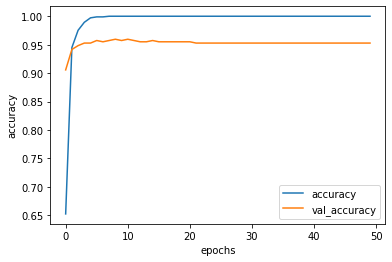

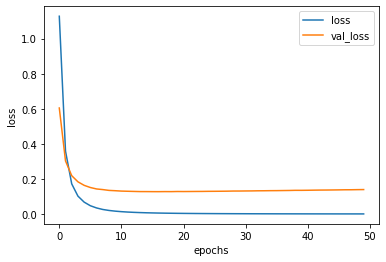

In [19]:

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("epochs")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

plot_graphs(history,"accuracy")
plot_graphs(history,"loss")


# **Submission On kaggle**

In [21]:
samples = pd.read_csv('/content/BBC News Test.csv')

In [22]:
samples.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [23]:
test_new = samples['Text']

In [24]:
x_new = tokenizer.texts_to_matrix(test_new)

In [25]:
text_labels = encoder.classes_ 
pre = []
for i in range(len(x_new)):
    prediction = model.predict(np.array([x_new[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(predicted_label + "\n")
    pre.append(predicted_label)

sport

tech

sport

business

sport

sport

politics

politics

entertainment

business

business

tech

politics

tech

entertainment

sport

politics

tech

entertainment

entertainment

business

politics

sport

business

politics

sport

business

sport

sport

business

politics

tech

business

business

sport

sport

sport

business

entertainment

tech

tech

politics

entertainment

tech

sport

tech

entertainment

business

politics

business

politics

business

business

business

tech

politics

tech

entertainment

sport

tech

sport

entertainment

tech

politics

business

entertainment

entertainment

tech

sport

sport

business

sport

business

politics

tech

sport

tech

tech

tech

entertainment

politics

sport

entertainment

entertainment

business

entertainment

business

entertainment

business

tech

business

politics

sport

tech

sport

sport

sport

sport

sport

sport

politics

sport

business

entertainment

business

sport

politics

sport

polit

In [26]:
submission = pd.DataFrame({
        "ArticleId": samples["ArticleId"],
        "Category": pre
    })

In [27]:
submission.to_csv('submission.csv', index=False)

In [30]:
!cp /content/text_classification_model.hdf5 /content/drive/My\ Drive

# **Sample Test**


In [36]:
samples = ["german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy.  munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january  its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up.   we re surprised that the ifo index has taken such a knock   said dz bank economist bernd weidensteiner.  the main reason is probably that the domestic economy is still weak  particularly in the retail trade.  economy and labour minister wolfgang clement called the dip in february s ifo confidence figure  a very mild decline . he said that despite the retreat  the index remained at a relatively high level and that he expected  a modest economic upswing  to continue.  germany s economy grew 1.6% last year after shrinking in 2003. however  the economy contracted by 0.2% during the last three months of 2004  mainly due to the reluctance of consumers to spend. latest indications are that growth is still proving elusive and ifo president hans-werner sinn said any improvement in german domestic demand was sluggish. exports had kept things going during the first half of 2004  but demand for exports was then hit as the value of the euro hit record levels making german products less competitive overseas. on top of that  the unemployment rate has been stuck at close to 10% and manufacturing firms  including daimlerchrysler  siemens and volkswagen  have been negotiating with unions over cost cutting measures. analysts said that the ifo figures and germany s continuing problems may delay an interest rate rise by the european central bank. eurozone interest rates are at 2%  but comments from senior officials have recently focused on the threat of inflation  prompting fears that interest rates may rise."]

tokenizer.fit_on_texts(samples)

sample_test = tokenizer.texts_to_matrix(samples)

prediction = model.predict(np.array(sample_test))

print(prediction)

[[8.8295084e-01 4.9466335e-06 2.9440664e-02 3.2733128e-04 8.7276235e-02]]


In [37]:
 predicted_label = text_labels[np.argmax(prediction)]

In [38]:
predicted_label

'business'